In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm
from multiprocessing import freeze_support

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [9]:

# Transformations
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split train into train and validation
val_size = int(0.1 * len(train_set))
train_size = len(train_set) - val_size
train_set, val_set = torch.utils.data.random_split(train_set, [train_size, val_size])

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


Training set size: 45000
Validation set size: 5000
Test set size: 10000


In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        # Layer 1
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        # Layer 2
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        # Output Layer (fc3)
        x = self.fc3(x)
        return x
mlp_model=MLP().to(device)

Epoch 1/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.70it/s]


Epoch 1: Train Loss: 1.9447, Train Acc: 29.73%, Val Loss: 1.7726, Val Acc: 36.54%


Epoch 2/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.81it/s]


Epoch 2: Train Loss: 1.7981, Train Acc: 34.95%, Val Loss: 1.6929, Val Acc: 38.92%


Epoch 3/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.76it/s]


Epoch 3: Train Loss: 1.7505, Train Acc: 36.72%, Val Loss: 1.6470, Val Acc: 40.78%


Epoch 4/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]


Epoch 4: Train Loss: 1.7277, Train Acc: 37.36%, Val Loss: 1.6494, Val Acc: 40.32%


Epoch 5/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.65it/s]


Epoch 5: Train Loss: 1.7088, Train Acc: 38.43%, Val Loss: 1.6259, Val Acc: 40.74%


Epoch 6/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.69it/s]


Epoch 6: Train Loss: 1.6988, Train Acc: 38.68%, Val Loss: 1.5992, Val Acc: 42.12%


Epoch 7/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.75it/s]


Epoch 7: Train Loss: 1.6787, Train Acc: 39.29%, Val Loss: 1.5898, Val Acc: 43.22%


Epoch 8/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 8: Train Loss: 1.6625, Train Acc: 40.00%, Val Loss: 1.5674, Val Acc: 42.88%


Epoch 9/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.69it/s]


Epoch 9: Train Loss: 1.6513, Train Acc: 40.43%, Val Loss: 1.5564, Val Acc: 43.84%


Epoch 10/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 10: Train Loss: 1.6397, Train Acc: 40.82%, Val Loss: 1.5694, Val Acc: 44.44%


Epoch 11/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 11: Train Loss: 1.6305, Train Acc: 41.42%, Val Loss: 1.5573, Val Acc: 43.92%


Epoch 12/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.75it/s]


Epoch 12: Train Loss: 1.6266, Train Acc: 41.47%, Val Loss: 1.5344, Val Acc: 44.54%


Epoch 13/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.70it/s]


Epoch 13: Train Loss: 1.6175, Train Acc: 41.89%, Val Loss: 1.5304, Val Acc: 44.52%


Epoch 14/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 14: Train Loss: 1.6142, Train Acc: 41.74%, Val Loss: 1.5284, Val Acc: 45.20%


Epoch 15/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.76it/s]


Epoch 15: Train Loss: 1.6002, Train Acc: 42.46%, Val Loss: 1.5098, Val Acc: 46.00%


Epoch 16/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.66it/s]


Epoch 16: Train Loss: 1.5895, Train Acc: 42.55%, Val Loss: 1.5021, Val Acc: 46.12%


Epoch 17/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 17: Train Loss: 1.5868, Train Acc: 42.84%, Val Loss: 1.4920, Val Acc: 46.08%


Epoch 18/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.72it/s]


Epoch 18: Train Loss: 1.5776, Train Acc: 43.60%, Val Loss: 1.4937, Val Acc: 45.76%


Epoch 19/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.81it/s]


Epoch 19: Train Loss: 1.5728, Train Acc: 43.53%, Val Loss: 1.4764, Val Acc: 47.10%


Epoch 20/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.72it/s]


Epoch 20: Train Loss: 1.5650, Train Acc: 43.83%, Val Loss: 1.5017, Val Acc: 46.30%


Epoch 21/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.74it/s]


Epoch 21: Train Loss: 1.5631, Train Acc: 43.76%, Val Loss: 1.4779, Val Acc: 47.66%


Epoch 22/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.74it/s]


Epoch 22: Train Loss: 1.5546, Train Acc: 44.09%, Val Loss: 1.4638, Val Acc: 47.72%


Epoch 23/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.72it/s]


Epoch 23: Train Loss: 1.5461, Train Acc: 44.53%, Val Loss: 1.4523, Val Acc: 47.72%


Epoch 24/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 24: Train Loss: 1.5376, Train Acc: 44.86%, Val Loss: 1.4459, Val Acc: 48.32%


Epoch 25/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]


Epoch 25: Train Loss: 1.5361, Train Acc: 44.87%, Val Loss: 1.4479, Val Acc: 48.84%


Epoch 26/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.83it/s]


Epoch 26: Train Loss: 1.5254, Train Acc: 45.36%, Val Loss: 1.4313, Val Acc: 48.82%


Epoch 27/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.76it/s]


Epoch 27: Train Loss: 1.5191, Train Acc: 45.42%, Val Loss: 1.4294, Val Acc: 48.44%


Epoch 28/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.81it/s]


Epoch 28: Train Loss: 1.5117, Train Acc: 45.54%, Val Loss: 1.4205, Val Acc: 48.82%


Epoch 29/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.79it/s]


Epoch 29: Train Loss: 1.5082, Train Acc: 45.82%, Val Loss: 1.4207, Val Acc: 49.24%


Epoch 30/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.76it/s]


Epoch 30: Train Loss: 1.4970, Train Acc: 46.50%, Val Loss: 1.4029, Val Acc: 49.32%


Epoch 31/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 31: Train Loss: 1.4913, Train Acc: 46.33%, Val Loss: 1.4120, Val Acc: 49.56%


Epoch 32/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.69it/s]


Epoch 32: Train Loss: 1.4790, Train Acc: 47.11%, Val Loss: 1.4038, Val Acc: 50.74%


Epoch 33/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.72it/s]


Epoch 33: Train Loss: 1.4743, Train Acc: 47.20%, Val Loss: 1.3921, Val Acc: 50.22%


Epoch 34/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 34: Train Loss: 1.4732, Train Acc: 47.24%, Val Loss: 1.3840, Val Acc: 50.98%


Epoch 35/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.74it/s]


Epoch 35: Train Loss: 1.4663, Train Acc: 47.30%, Val Loss: 1.3692, Val Acc: 51.80%


Epoch 36/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 36: Train Loss: 1.4528, Train Acc: 47.89%, Val Loss: 1.3807, Val Acc: 51.38%


Epoch 37/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.76it/s]


Epoch 37: Train Loss: 1.4472, Train Acc: 48.16%, Val Loss: 1.3683, Val Acc: 51.06%


Epoch 38/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 38: Train Loss: 1.4343, Train Acc: 48.84%, Val Loss: 1.3572, Val Acc: 51.22%


Epoch 39/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.67it/s]


Epoch 39: Train Loss: 1.4289, Train Acc: 48.81%, Val Loss: 1.3536, Val Acc: 51.48%


Epoch 40/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]


Epoch 40: Train Loss: 1.4159, Train Acc: 49.39%, Val Loss: 1.3461, Val Acc: 52.40%


Epoch 41/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 41: Train Loss: 1.4164, Train Acc: 49.44%, Val Loss: 1.3560, Val Acc: 51.62%


Epoch 42/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 42: Train Loss: 1.4048, Train Acc: 49.84%, Val Loss: 1.3341, Val Acc: 52.86%


Epoch 43/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.76it/s]


Epoch 43: Train Loss: 1.4000, Train Acc: 49.75%, Val Loss: 1.3481, Val Acc: 51.98%


Epoch 44/50 [MLP]: 100%|██████████| 176/176 [00:36<00:00,  4.77it/s]


Epoch 44: Train Loss: 1.3952, Train Acc: 50.13%, Val Loss: 1.3388, Val Acc: 51.58%


Epoch 45/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.71it/s]


Epoch 45: Train Loss: 1.3897, Train Acc: 50.34%, Val Loss: 1.3240, Val Acc: 52.44%


Epoch 46/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 46: Train Loss: 1.3845, Train Acc: 50.56%, Val Loss: 1.3301, Val Acc: 52.34%


Epoch 47/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.73it/s]


Epoch 47: Train Loss: 1.3845, Train Acc: 50.64%, Val Loss: 1.3144, Val Acc: 52.64%


Epoch 48/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.69it/s]


Epoch 48: Train Loss: 1.3849, Train Acc: 50.58%, Val Loss: 1.3223, Val Acc: 53.20%


Epoch 49/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.70it/s]


Epoch 49: Train Loss: 1.3806, Train Acc: 50.56%, Val Loss: 1.3319, Val Acc: 52.24%


Epoch 50/50 [MLP]: 100%|██████████| 176/176 [00:37<00:00,  4.75it/s]


Epoch 50: Train Loss: 1.3829, Train Acc: 50.48%, Val Loss: 1.3195, Val Acc: 53.12%
Finished Training


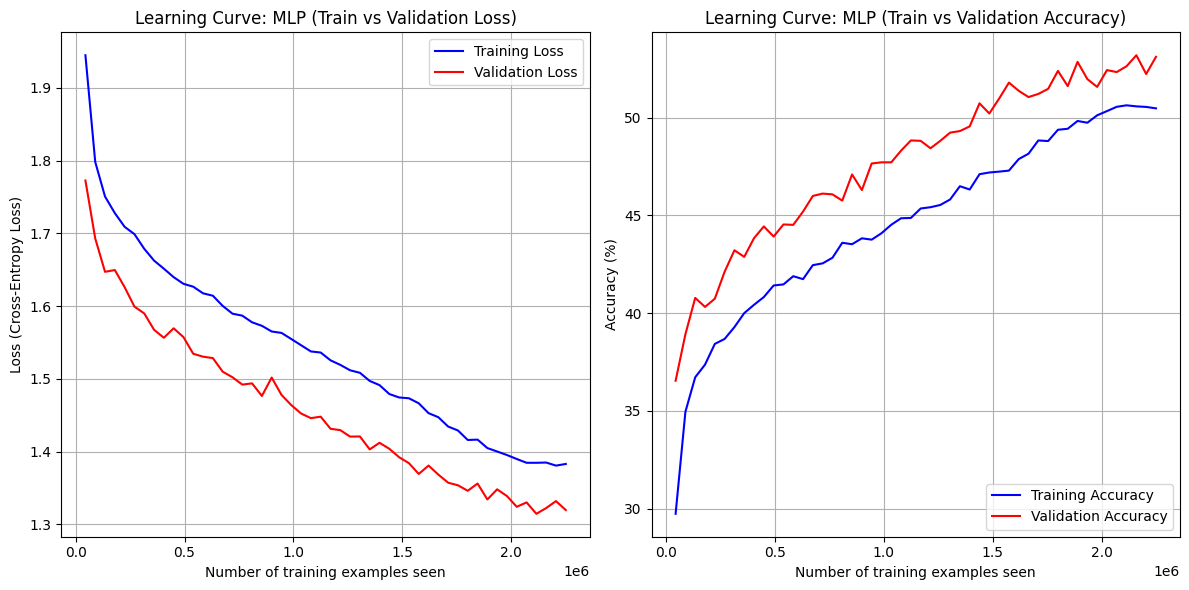

In [11]:
def evaluate_model(model, loader, criterion):
    model.eval()
    loss_cnt = 0.0
    accuracy = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)

            loss_cnt += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

    loss = loss_cnt / len(loader)
    acc = 100 * accuracy / total
    return loss, acc
# Train model
def train_model(model, train_loader, val_loader, num_epochs=50, model_name='Model'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    # OneCycleLR scheduler
    scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=num_epochs)

    train_counter = []
    train_losses = []
    train_accs = []

    val_counter = []
    val_losses= []
    val_accs = []

    # Early Stopping parameters
    best_val_acc = -1.0
    epochs_no_improve = 0
    limit_epoch = 10 # The limited epoches in which the epoches have no improvement compared with the previous one

    for epoch in range(num_epochs):
        model.train()
        loss_cnt = 0.0
        accuracy= 0
        total= 0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [{model_name}]'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_val = criterion(outputs, labels)
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            scheduler.step()
            loss_cnt+= loss_val.item()
            _, predicted = torch.max(outputs.data, 1)
            total+= labels.size(0)
            accuracy += (predicted == labels).sum().item()

        epoch_train_loss = loss_cnt / len(train_loader)
        epoch_train_acc = 100 * accuracy / total
        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)
        train_counter.append((epoch + 1) * len(train_loader.dataset))

        val_loss, val_acc = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_counter.append((epoch + 1) * len(train_loader.dataset))

        print(f'Epoch {epoch+1}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Early Stopping Check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == limit_epoch:
                print(f"Stop after {limit_epoch} epochs with no improvement.")
                break

    print(f"Finished Training")

    # Plotting Learning Curves (Loss)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_counter, train_losses, color='blue', label='Training Loss')
    plt.plot(val_counter, val_losses, color='red', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Loss (Cross-Entropy Loss)')
    plt.title(f'Learning Curve: {model_name} (Train vs Validation Loss)')
    plt.grid(True)
    # Plotting Learning Curves (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(train_counter, train_accs, color='blue', label='Training Accuracy')
    plt.plot(val_counter, val_accs, color='red', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Learning Curve: {model_name} (Train vs Validation Accuracy)')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{model_name}_Learning_curves_loss_acc.png')
    plt.show()

    return model
freeze_support()
num_epochs = 50
mlp_model = train_model(mlp_model, train_loader, val_loader, num_epochs=num_epochs, model_name='MLP')


 Evaluation for MLP on test set...
MLP Test Loss: 1.1946, Test Accuracy: 58.05%


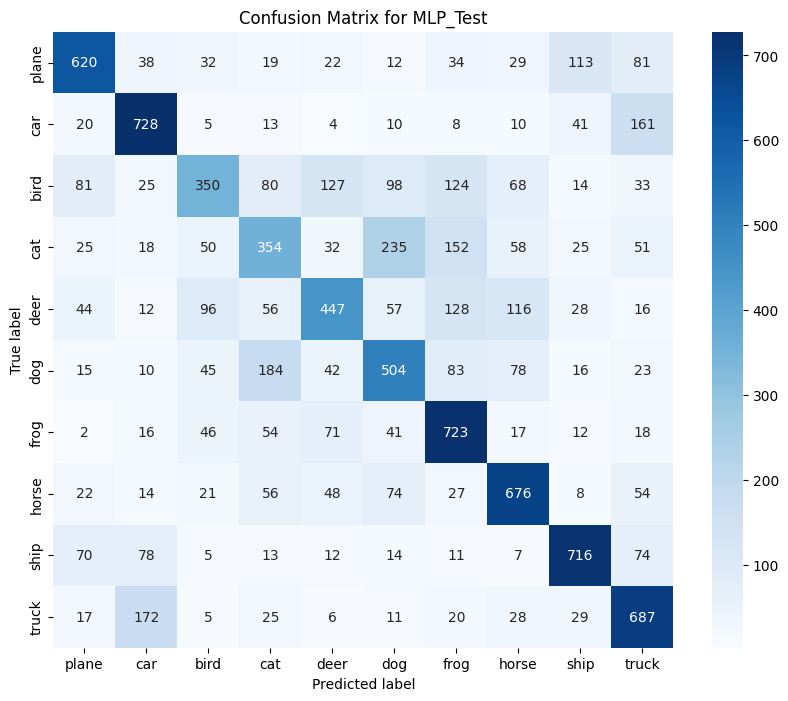

In [14]:
def plot_confusion_matrix(all_labels, all_preds, classes, model_name="Model"):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.savefig(f'{model_name}_Confusion_matrix.png')
    plt.show()

criterion = nn.CrossEntropyLoss()
# Evaluate MLP on test set
print("\n Evaluation for MLP on test set...")
mlp_preds= []
mlp_labels = []
mlp_model.eval()
loss_cnt = 0.0
accuracy = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mlp_model(images)
        loss = criterion(outputs, labels)
        loss_cnt += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        accuracy += (predicted == labels).sum().item()
        total += labels.size(0)
        mlp_preds.extend(predicted.cpu().numpy())
        mlp_labels.extend(labels.cpu().numpy())
test_loss = loss_cnt / len(test_loader)
test_acc = 100 * accuracy/total
print(f"MLP Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
plot_confusion_matrix(mlp_labels,mlp_preds, classes, model_name='MLP_Test')


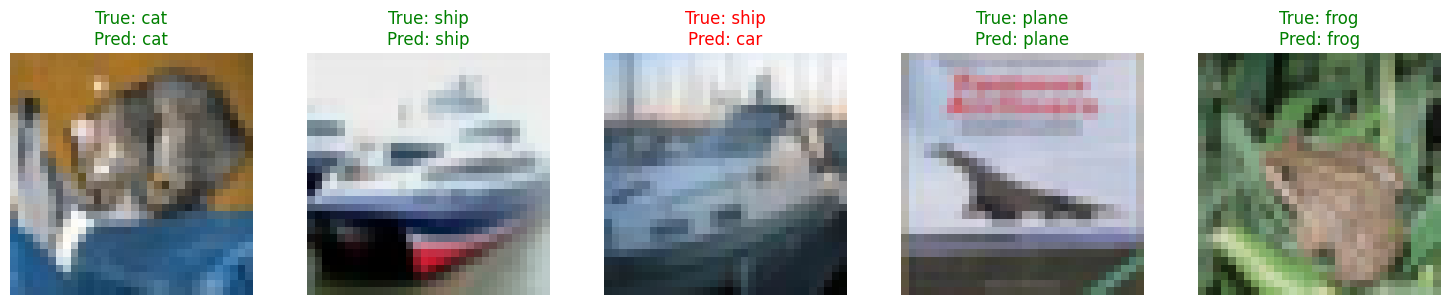

In [15]:
# Predict and display images
def predict_images(images, model, num_images=5):
    fig = plt.figure(figsize=(15, 3))
    for i in range(num_images):
        img, label = images[i]
        img_tensor = img.unsqueeze(0).to(device)
        with torch.no_grad():
            model.eval()
            out = model(img_tensor)
            _, preds = torch.max(out, dim=1)

        # Show images
        ax = fig.add_subplot(1, num_images, i+1)
        img_show = img.permute(1, 2, 0).numpy()
        img_show = img_show * 0.5 + 0.5
        ax.imshow(img_show)
        ax.axis('off')

        # Show label and prediction
        pred_class = classes[preds[0].item()]
        true_class = classes[label]
        color = 'green' if pred_class == true_class else 'red'
        ax.set_title(f'True: {true_class}\nPred: {pred_class}', color=color)

    plt.tight_layout()
    plt.show()
test_images_for_pred = [test_set[i] for i in range(5)]
predict_images(test_images_for_pred, mlp_model)
